In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npb
import seaborn as sns

# Covid-19 Jakarta Per-Kota

In [5]:
df = pd.read_excel("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Data Covid-19 Jakarta Per-Kota-Fixed.xlsx")
df.describe()

,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
count,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000
mean,32540.769006,570.798246,29990.788174,499.775179,1397.423002,1968.221248,235.747238,230.054906
std,43373.198007,865.473940,40688.768354,717.869911,2732.766476,3524.677954,433.533756,483.219557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1043.500000,134.000000,543.000000,7.000000,259.250000,479.000000,14.000000,7.000000
50%,12379.500000,303.000000,10797.000000,139.500000,565.000000,935.000000,97.000000,89.000000
75%,50587.500000,633.750000,47323.500000,788.000000,1321.000000,1984.250000,246.750000,230.000000
max,209631.000000,6652.000000,204271.000000,3645.000000,23844.000000,28666.000000,3725.000000,6244.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nama Kota       3078 non-null   object        
 1   Tanggal         3078 non-null   datetime64[ns]
 2   Positif         3078 non-null   int64         
 3   Dirawat         3078 non-null   int64         
 4   Sembuh          3078 non-null   int64         
 5   Meninggal       3078 non-null   int64         
 6   Self Isolation  3078 non-null   int64         
 7   Positif Aktif   3078 non-null   int64         
 8   Positif Harian  3078 non-null   int64         
 9   Sembuh Harian   3078 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 240.6+ KB


In [7]:
df.corr()

,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
Positif,1.000000,0.652094,0.997620,0.941333,0.557613,0.592450,0.571429,0.578764
Dirawat,0.652094,1.000000,0.603431,0.570267,0.889229,0.934987,0.883858,0.728522
Sembuh,0.997620,0.603431,1.000000,0.943936,0.499575,0.535503,0.520041,0.539458
Meninggal,0.941333,0.570267,0.943936,1.000000,0.463758,0.499590,0.463583,0.464192
Self Isolation,0.557613,0.889229,0.499575,0.463758,1.000000,0.993671,0.910006,0.787111
Positif Aktif,0.592450,0.934987,0.535503,0.499590,0.993671,1.000000,0.922578,0.789153
Positif Harian,0.571429,0.883858,0.520041,0.463583,0.910006,0.922578,1.000000,0.766168
Sembuh Harian,0.578764,0.728522,0.539458,0.464192,0.787111,0.789153,0.766168,1.000000


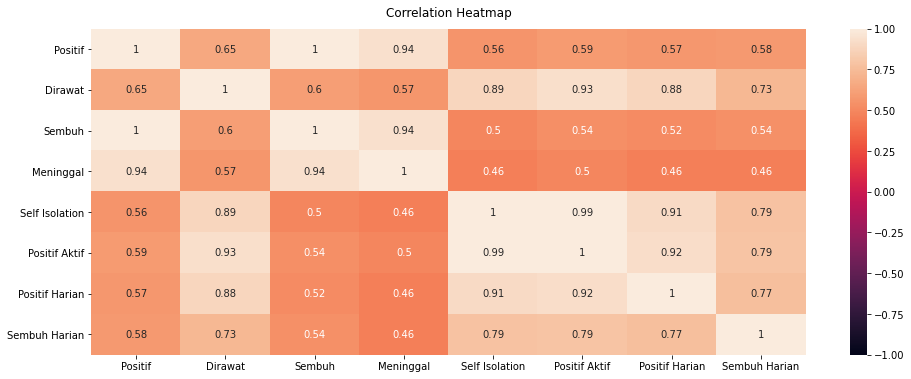

In [8]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [22]:
df1 = df.loc[df['Nama Kota']=='JAKARTA BARAT']
df1

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-04-01,139,83,11,9,36,119,0,0
1,JAKARTA BARAT,2020-04-02,145,84,13,9,39,123,6,2
2,JAKARTA BARAT,2020-04-03,159,91,13,11,44,135,14,0
3,JAKARTA BARAT,2020-04-04,168,97,13,13,45,142,9,0
4,JAKARTA BARAT,2020-04-05,176,100,13,14,49,149,8,0
...,...,...,...,...,...,...,...,...,...,...
508,JAKARTA BARAT,2021-08-22,145003,449,141530,2466,558,1007,64,69
509,JAKARTA BARAT,2021-08-23,145047,405,141660,2471,511,916,44,130
510,JAKARTA BARAT,2021-08-24,145111,422,141694,2473,522,944,64,34
511,JAKARTA BARAT,2021-08-25,145185,392,141805,2476,512,904,74,111


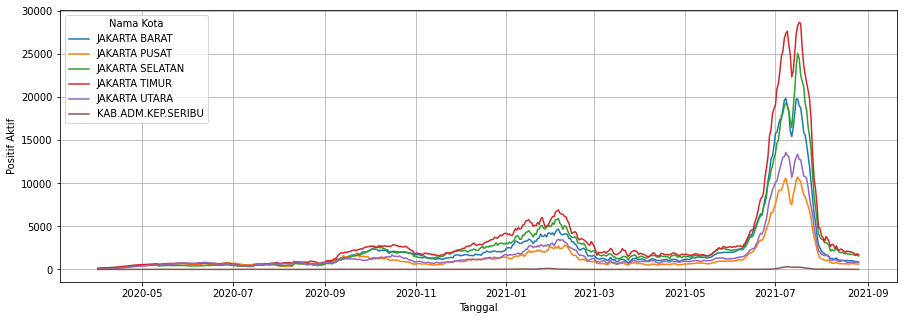

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
plt.grid()
sns.lineplot(y = df['Positif Aktif'], x = df['Tanggal'] , hue = df['Nama Kota'], data = df, ax = ax);

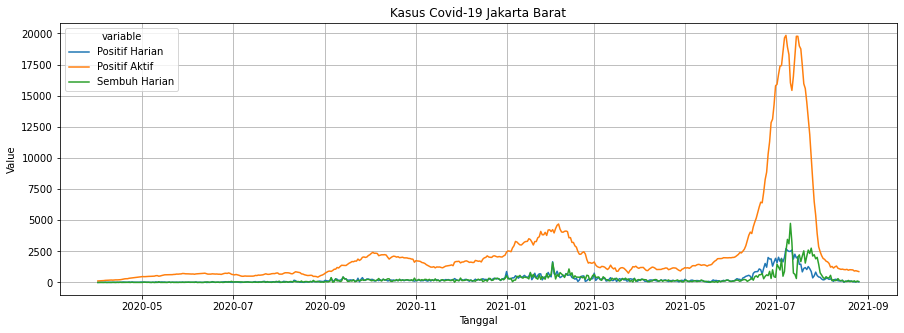

In [23]:
df1 = pd.melt(df1, id_vars = ['Tanggal'], value_vars = ['Positif Harian', 'Positif Aktif','Sembuh Harian']
             ,value_name = 'Value')
fig, ax = plt.subplots(figsize=(15,5))
plt.grid()
plt.title("Kasus Covid-19 Jakarta Barat")
sns.lineplot(y = 'Value', x = df1['Tanggal'] , hue = 'variable', data = df1, ax = ax);

In [24]:
congest_covid_df = pd.read_excel("/content/drive/MyDrive/finalProjectCompfest/congest_covid.xlsx")
congest_covid_df

,Tanggal,Average Travel Time,Positif Aktif,Positif Harian,Sembuh Harian
0,2021-01-04,62.40,12442,1651,1951
1,2021-01-05,62.40,12952,1491,959
2,2021-01-06,65.00,13883,2004,1055
3,2021-01-07,67.08,15032,2141,973
4,2021-01-08,63.96,15145,2219,2081
...,...,...,...,...,...
230,2021-08-22,56.16,6214,522,613
231,2021-08-23,61.88,5932,260,523
232,2021-08-24,62.92,5750,347,519
233,2021-08-25,63.44,5889,622,473


In [25]:
congest_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tanggal              235 non-null    datetime64[ns]
 1   Average Travel Time  235 non-null    float64       
 2   Positif Aktif        235 non-null    int64         
 3   Positif Harian       235 non-null    int64         
 4   Sembuh Harian        235 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 9.3 KB


In [26]:
congest_covid_df.describe()

,Average Travel Time,Positif Aktif,Positif Harian,Sembuh Harian
count,235.000000,235.000000,235.000000,235.000000
mean,65.044255,19618.387234,2464.604255,2453.004255
std,6.489663,23150.234325,2713.637626,3146.470605
min,53.040000,4573.000000,150.000000,79.000000
25%,59.800000,6285.000000,762.000000,713.500000
50%,63.960000,9192.000000,1481.000000,1310.000000
75%,70.720000,19225.000000,2760.500000,2545.000000
max,81.120000,97512.000000,12613.000000,18388.000000


In [27]:
congest_covid_df.corr()

,Average Travel Time,Positif Aktif,Positif Harian,Sembuh Harian
Average Travel Time,1.000000,-0.563045,-0.537073,-0.490110
Positif Aktif,-0.563045,1.000000,0.917029,0.743382
Positif Harian,-0.537073,0.917029,1.000000,0.715558
Sembuh Harian,-0.490110,0.743382,0.715558,1.000000


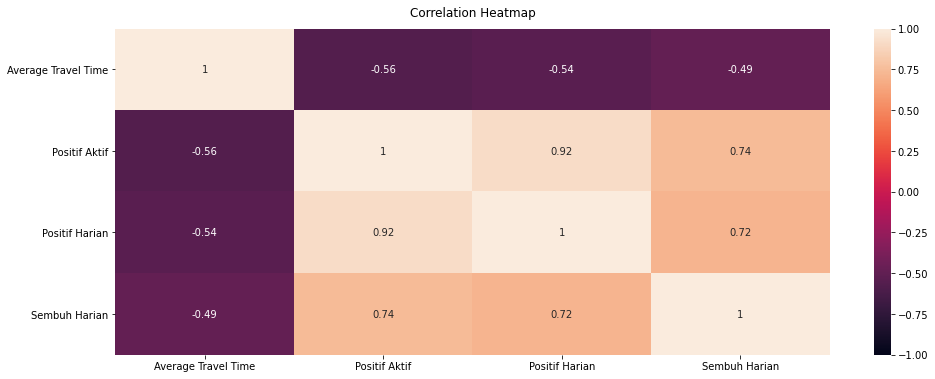

In [28]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(congest_covid_df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

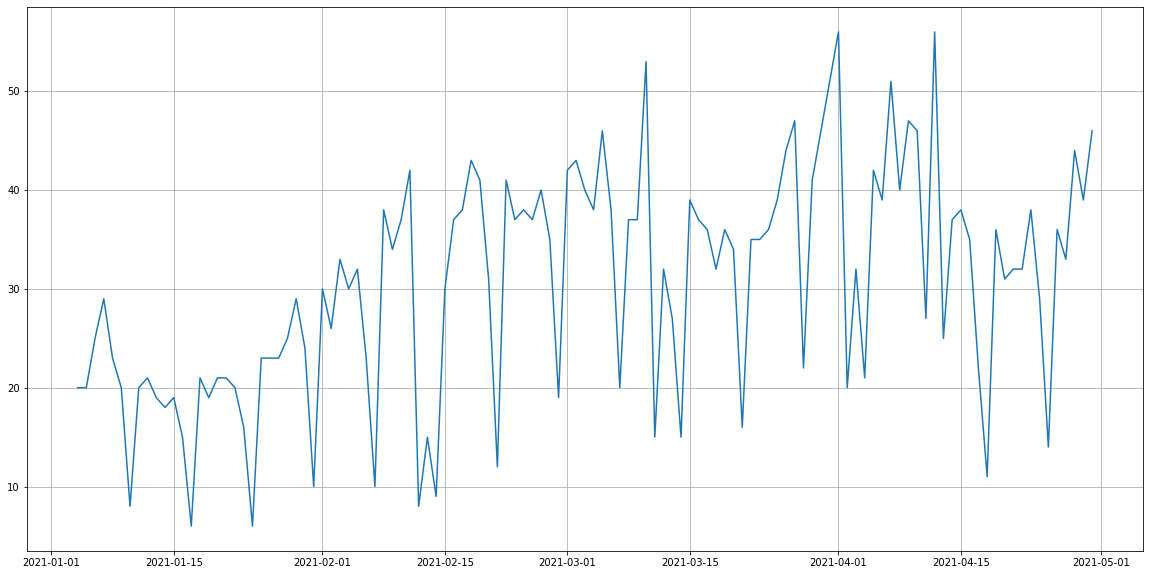

In [ ]:
Jan_Apr = congestion_df.loc[(congestion_df['Tanggal'] >= '2021-01-04') & (congestion_df['Tanggal'] <= '2021-04-30')]
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(Jan_Apr['Tanggal'],Jan_Apr['Average Congestion'])

# Vaksinasi

In [30]:
data_vaksinasi_jakarta = '/content/drive/MyDrive/finalProjectCompfest/Daily Update Data Vaksinasi Covid-19 Jakarta.xlsx'

In [ ]:
data_vaksinasi = pd.read_excel(data_vaksinasi_jakarta, sheet_name='Vaksinasi')

In [ ]:
data_vaksinasi.head()

,Tanggal,Target Vaksinasi Tenaga Kesehatan,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Target Vaksinasi Lansia,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,Persentase 2 Lansia,Target Vaksinasi Pelayan Publik,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Target Vaksinasi Total,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total,Vaksinasi 1 Harian,Vaksinasi 2 Harian
0,2021-03-05,112301,141425,91078,1.259339,0.811017,911631,76451,0,0.083862,0.000000,1976757,64121,0,0.032437,0.000000,3000689,281997,91078,0.093977,0.030352,NaN,NaN
1,2021-03-06,112301,144046,91379,1.282678,0.813697,911631,79421,0,0.087120,0.000000,1976757,66484,0,0.033633,0.000000,3000689,289951,91379,0.096628,0.030453,NaN,NaN
2,2021-03-07,112301,177126,91460,1.577243,0.814418,911631,83628,0,0.091734,0.000000,1976757,73752,2514,0.037310,0.001272,3000689,334506,93974,0.111476,0.031317,NaN,NaN
3,2021-03-08,112301,181237,92988,1.613850,0.828025,911631,95140,1,0.104362,0.000001,1976757,85333,3989,0.043168,0.002018,3000689,361710,96978,0.120542,0.032319,NaN,NaN
4,2021-03-09,112301,113326,89984,1.009127,0.801275,911631,135128,675,0.148227,0.000740,1976757,174685,29195,0.088369,0.014769,3000689,423139,119854,0.141014,0.039942,NaN,NaN


In [ ]:
data_vaksinasi.tail()

,Tanggal,Target Vaksinasi Tenaga Kesehatan,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Target Vaksinasi Lansia,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,Persentase 2 Lansia,Target Vaksinasi Pelayan Publik,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Target Vaksinasi Total,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total,Vaksinasi 1 Harian,Vaksinasi 2 Harian
168,2021-08-20,112301,146009,131541,1.300158,1.171325,911631,778077,662573,0.8535,0.726800,1976757,8360969,3885330,4.229639,1.965507,8941211,9285055,4679444,1.038456,0.523357,44747.0,117829.0
169,2021-08-21,112301,146276,131945,1.302535,1.174923,911631,779171,663758,0.8547,0.728099,1976757,8393744,3967204,4.246219,2.006925,8941211,9319191,4762907,1.042274,0.532691,34136.0,83463.0
170,2021-08-22,112301,146472,132277,1.304280,1.177879,911631,780174,664943,0.8558,0.729399,1976757,8424447,4048051,4.261751,2.047824,8941211,9351093,4845271,1.045842,0.541903,31902.0,82364.0
171,2021-08-23,112301,146495,132325,1.304485,1.178307,911631,780447,665399,0.8561,0.729899,1976757,8436966,4081847,4.268085,2.064921,8941211,9363908,4879571,1.047275,0.545739,12815.0,34300.0
172,2021-08-24,112301,146752,132749,1.306774,1.182082,911631,781906,667040,0.8577,0.731700,1976757,8480560,4178798,4.290138,2.113966,8941211,9409218,4978587,1.052343,0.556814,45310.0,99016.0


In [ ]:
data_vaksinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tanggal                            173 non-null    datetime64[ns]
 1   Target Vaksinasi Tenaga Kesehatan  173 non-null    int64         
 2   Vaksinasi 1 Tenaga Kesehatan       173 non-null    int64         
 3   Vaksinasi 2 Tenaga Kesehatan       173 non-null    int64         
 4   Persentase 1 Tenaga Kesehatan      173 non-null    float64       
 5   Persentase 2 Tenaga Kesehatan      173 non-null    float64       
 6   Target Vaksinasi Lansia            173 non-null    int64         
 7   Vaksinasi 1 Lansia                 173 non-null    int64         
 8   Vaksinasi 2 Lansia                 173 non-null    int64         
 9   Persentase 1 Lansia                173 non-null    float64       
 10  Persentase 2 Lansia                173

In [ ]:
data_vaksinasi.describe()

,Target Vaksinasi Tenaga Kesehatan,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Target Vaksinasi Lansia,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,Persentase 2 Lansia,Target Vaksinasi Pelayan Publik,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Target Vaksinasi Total,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total,Vaksinasi 1 Harian,Vaksinasi 2 Harian
count,173.0,173.000000,173.000000,173.000000,173.000000,173.0,173.000000,173.000000,173.000000,173.000000,173.0,1.730000e+02,1.730000e+02,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,72.000000,68.000000
mean,112301.0,133028.520231,115274.988439,1.184571,1.026482,911631.0,558188.052023,415960.583815,0.612296,0.456282,1976757.0,2.952001e+06,1.155794e+06,1.493355,0.584692,5.298531e+06,3.643217e+06,1.686935e+06,0.646417,0.329805,90670.722222,45638.470588
std,0.0,9400.445811,10436.166526,0.083708,0.092930,0.0,151850.168202,215983.968137,0.166570,0.236920,0.0,2.590120e+06,9.484703e+05,1.310288,0.479811,2.863851e+06,2.708666e+06,1.131478e+06,0.246444,0.178955,59367.406570,55158.994605
min,112301.0,113326.000000,89984.000000,1.009127,0.801275,911631.0,76451.000000,0.000000,0.083862,0.000000,1976757.0,6.412100e+04,0.000000e+00,0.032437,0.000000,3.000689e+06,2.819970e+05,9.107800e+04,0.093977,0.030352,-43536.000000,210.000000
25%,112301.0,125808.000000,109105.000000,1.120275,0.971541,911631.0,549011.000000,278295.000000,0.602229,0.305272,1976757.0,9.677330e+05,4.616480e+05,0.489556,0.233538,3.000689e+06,1.641932e+06,8.490480e+05,0.471606,0.216364,49256.750000,3903.250000
50%,112301.0,135712.000000,119600.000000,1.208467,1.064995,911631.0,591661.000000,531718.000000,0.649014,0.583260,1976757.0,1.707434e+06,1.124013e+06,0.863755,0.568615,3.000689e+06,2.432561e+06,1.775331e+06,0.664606,0.285647,89284.500000,15069.000000
75%,112301.0,136733.000000,121794.000000,1.217558,1.084532,911631.0,599877.000000,535273.000000,0.658026,0.587160,1976757.0,4.729394e+06,1.294628e+06,2.392501,0.654925,8.815157e+06,5.466004e+06,1.951695e+06,0.839511,0.489815,117910.750000,82857.000000
max,112301.0,181237.000000,132749.000000,1.613850,1.182082,911631.0,781906.000000,667040.000000,0.857700,0.731700,1976757.0,8.480560e+06,4.178798e+06,4.290138,2.113966,8.941211e+06,9.409218e+06,4.978587e+06,1.052343,0.624913,381150.000000,231568.000000


In [31]:
data_combined = pd.read_excel(data_vaksinasi_jakarta, sheet_name='Combined')

In [56]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tanggal                            542 non-null    datetime64[ns]
 1   Positif (Indonesia)                542 non-null    int64         
 2   Dirawat (Indonesia)                542 non-null    int64         
 3   Sembuh (Indonesia)                 542 non-null    int64         
 4   Meninggal (Indonesia)              542 non-null    int64         
 5   Meninggal (Jakarta)                542 non-null    int64         
 6   Sembuh (Jakarta)                   542 non-null    int64         
 7   Self-Isolation (Jakarta)           542 non-null    int64         
 8   Dirawat (Jakarta)                  542 non-null    int64         
 9   Positif (Jakarta)                  542 non-null    int64         
 10  Positif Aktif (Jakarta)            542

In [55]:
data_combined

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Target Vaksinasi Tenaga Kesehatan,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Target Vaksinasi Lansia,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,Persentase 2 Lansia,Target Vaksinasi Pelayan Publik,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Target Vaksinasi Total,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total
0,2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-02,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-03,2,2,0,0,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-04,2,2,0,0,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2021-08-19,3930300,334752,3472915,122633,13121,821451,5794,3004,843370,8798,22053,-8451,29012,1492,34,934,-212,-25,731,-237,112301.0,145760.0,131099.0,1.297940,1.167389,911631.0,776527.0,660659.0,0.8518,0.724700,1976757.0,8318021.0,3769857.0,4.207913,1.907092,8941211.0,9240308.0,4561615.0,1.033452,0.510179
538,2021-08-20,3950304,327286,3499037,123981,13132,822399,5721,3087,844339,8808,20004,-7466,26122,1348,11,948,-73,83,969,10,112301.0,146009.0,131541.0,1.300158,1.171325,911631.0,778077.0,662573.0,0.8535,0.726800,1976757.0,8360969.0,3885330.0,4.229639,1.965507,8941211.0,9285055.0,4679444.0,1.038456,0.523357
539,2021-08-21,3967048,319658,3522048,125342,13152,823314,5565,3199,845230,8764,16744,-7628,23011,1361,20,915,-156,112,891,-44,112301.0,146276.0,131945.0,1.302535,1.174923,911631.0,779171.0,663758.0,0.8547,0.728099,1976757.0,8393744.0,3967204.0,4.246219,2.006925,8941211.0,9319191.0,4762907.0,1.042274,0.532691
540,2021-08-22,3979456,306760,3546324,126372,13173,824227,5584,2947,845931,8531,12408,-12898,24276,1030,21,913,19,-252,701,-233,112301.0,146472.0,132277.0,1.304280,1.177879,911631.0,780174.0,664943.0,0.8558,0.729399,1976757.0,8424447.0,4048051.0,4.261751,2.047824,8941211.0,9351093.0,4845271.0,1.045842,0.541903


In [33]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tanggal                            542 non-null    datetime64[ns]
 1   Positif (Indonesia)                542 non-null    int64         
 2   Dirawat (Indonesia)                542 non-null    int64         
 3   Sembuh (Indonesia)                 542 non-null    int64         
 4   Meninggal (Indonesia)              542 non-null    int64         
 5   Meninggal (Jakarta)                542 non-null    int64         
 6   Sembuh (Jakarta)                   542 non-null    int64         
 7   Self-Isolation (Jakarta)           542 non-null    int64         
 8   Dirawat (Jakarta)                  542 non-null    int64         
 9   Positif (Jakarta)                  542 non-null    int64         
 10  Positif Aktif (Jakarta)            542

In [35]:
data_combined.describe()

,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Target Vaksinasi Tenaga Kesehatan,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Target Vaksinasi Lansia,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,Persentase 2 Lansia,Target Vaksinasi Pelayan Publik,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Target Vaksinasi Total,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total
count,5.420000e+02,542.000000,5.420000e+02,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.0,1.720000e+02,1.720000e+02,172.000000,172.000000,1.720000e+02,1.720000e+02,1.720000e+02,172.000000,172.000000
mean,9.224891e+05,108966.946494,7.870507e+05,26471.492620,3806.560886,207349.197417,9539.221402,4269.345018,224964.324723,13808.566421,7359.889299,536.464945,6588.712177,234.712177,24.341328,1522.062731,10.105166,5.143911,1561.653137,15.249077,112301.0,132948.732558,115173.395349,1.183861,1.025578,911631.0,556887.366279,414500.819767,0.610869,0.454680,1976757.0,2.919858e+06,1.138218e+06,1.477095,0.575801,5.277353e+06,3.609694e+06,1.667797e+06,0.644057,0.328485
std,1.007736e+06,125056.065305,8.717803e+05,28041.925473,3531.520161,225861.913394,14703.578800,4962.623378,239391.579782,19328.673196,10104.289149,4820.235777,9319.940530,377.114233,32.204920,2642.253414,1360.800973,559.601857,2315.670879,1712.475053,0.0,9368.958559,10380.486085,0.083427,0.092434,0.0,151323.918660,215756.975896,0.165993,0.236671,0.0,2.562845e+06,9.225530e+05,1.296489,0.466700,2.858594e+06,2.680340e+06,1.106345e+06,0.245195,0.178631
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25725.000000,0.000000,0.000000,0.000000,0.000000,-11310.000000,-4253.000000,0.000000,-12107.000000,112301.0,113326.000000,89984.000000,1.009127,0.801275,911631.0,76451.000000,0.000000,0.083862,0.000000,1976757.0,6.412100e+04,0.000000e+00,0.032437,0.000000,3.000689e+06,2.819970e+05,9.107800e+04,0.093977,0.030352
25%,7.737875e+04,36617.250000,3.692575e+04,3669.500000,711.000000,9438.000000,3176.250000,1947.750000,14707.750000,4704.250000,1578.250000,-303.500000,1067.500000,59.250000,7.000000,191.500000,-115.500000,-89.000000,275.750000,-118.750000,112301.0,125748.000000,109088.250000,1.119741,0.971392,911631.0,548836.750000,276943.000000,0.602038,0.303788,1976757.0,9.657960e+05,4.608908e+05,0.488576,0.233155,3.000689e+06,1.639811e+06,8.469220e+05,0.470124,0.216223
50%,5.142945e+05,66665.000000,4.317280e+05,16288.500000,2590.500000,119693.000000,5360.000000,2977.000000,130993.000000,8583.500000,4421.500000,252.500000,4068.000000,118.000000,16.000000,926.500000,24.000000,14.500000,936.000000,48.000000,112301.0,134742.500000,119589.000000,1.199833,1.064897,911631.0,591661.000000,531718.000000,0.649014,0.583260,1976757.0,1.707434e+06,1.122984e+06,0.863755,0.568094,3.000689e+06,2.432549e+06,1.774291e+06,0.660321,0.284299
75%,1.561687e+06,127797.250000,1.408386e+06,42419.250000,6432.250000,377587.500000,9429.000000,4476.250000,391322.750000,13099.250000,7262.750000,859.750000,6957.000000,194.000000,25.000000,1451.500000,197.500000,119.500000,1591.000000,218.000000,112301.0,136733.000000,121794.000000,1.217558,1.084532,911631.0,599877.00

In [40]:
correlation = data_combined.corr()

In [41]:
correlation.dropna(inplace=True)
correlation

,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Target Vaksinasi Tenaga Kesehatan,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Target Vaksinasi Lansia,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,Persentase 2 Lansia,Target Vaksinasi Pelayan Publik,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Target Vaksinasi Total,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total


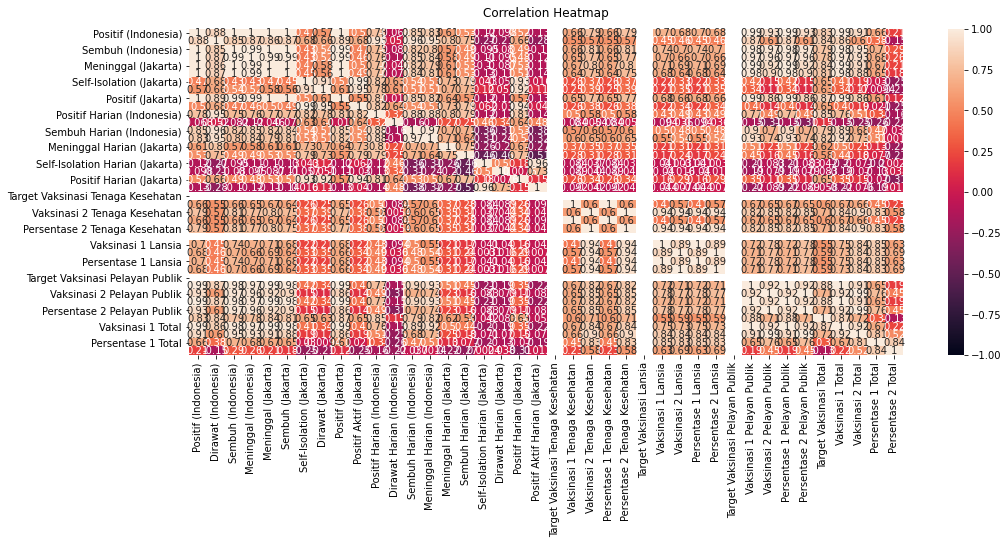

In [42]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data_combined.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

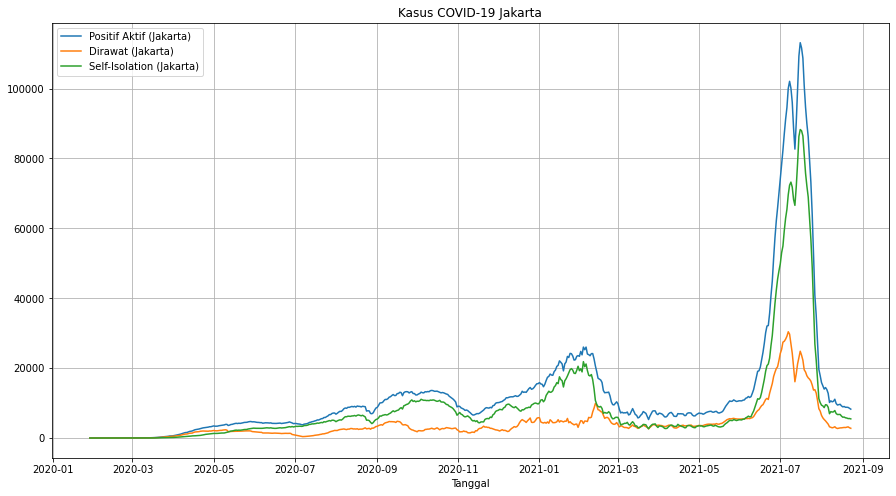

In [43]:
tanggal = data_combined['Tanggal']
values = data_combined[['Positif Aktif (Jakarta)', 'Dirawat (Jakarta)', 'Self-Isolation (Jakarta)']]

plt.figure(figsize=(15,8))
plt.title("Kasus COVID-19 Jakarta")
plt.xlabel("Tanggal")
plt.plot(tanggal, values)
plt.grid()
plt.legend(values)

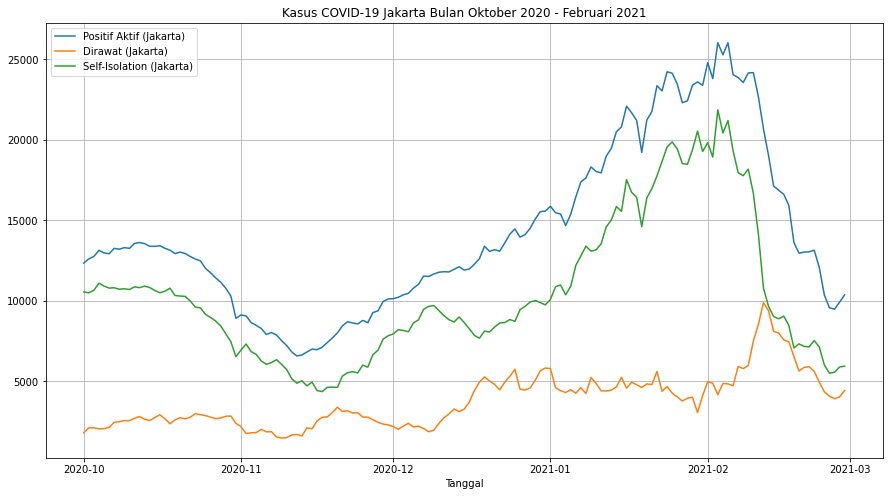

In [44]:
tanggal = data_combined['Tanggal'].loc[(data_combined['Tanggal'] >= '2020-10-01') & (data_combined['Tanggal'] <= '2021-02-28')]
values = data_combined[['Positif Aktif (Jakarta)', 'Dirawat (Jakarta)', 'Self-Isolation (Jakarta)']].loc[(data_combined['Tanggal'] >= '2020-10-01') & (data_combined['Tanggal'] <= '2021-02-28')]

plt.figure(figsize=(15,8))
plt.title("Kasus COVID-19 Jakarta Bulan Oktober 2020 - Februari 2021")
plt.xlabel("Tanggal")
plt.plot(tanggal, values)
plt.grid()
plt.legend(values)

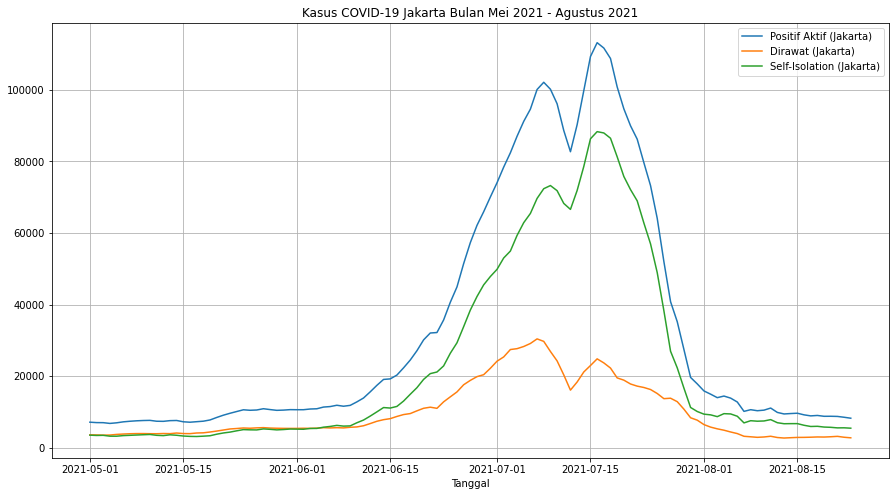

In [45]:
tanggal = data_combined['Tanggal'].loc[(data_combined['Tanggal'] >= '2021-5-01')]
values = data_combined[['Positif Aktif (Jakarta)', 'Dirawat (Jakarta)', 'Self-Isolation (Jakarta)']].loc[(data_combined['Tanggal'] >= '2021-5-01')]

plt.figure(figsize=(15,8))
plt.title("Kasus COVID-19 Jakarta Bulan Mei 2021 - Agustus 2021")
plt.xlabel("Tanggal")
plt.plot(tanggal, values)
plt.grid()
plt.legend(values)

In [46]:
data_vaksinasi_wilayah = pd.read_excel(data_vaksinasi_jakarta, sheet_name='Vaksinasi Wilayah')

In [ ]:
data_vaksinasi_wilayah.head()

,Kecamatan,Kota / Kabupaten,Target Total per Kecamatan,Target Harian per Kecamatan,Cakupan Suntik 1 13 Jan - 11 Juni 2021,Keterangan,Cakupan Suntik 2 13 Jan - 11 Juni 2021,Cakupan Suntik 1,Keterangan.1,Cakupan Suntik 2,Cakupan Suntik 1.1,Keterangan.2,Cakupan Suntik 2.1,Cakupan Suntik 1.2,Keterangan.3,Cakupan Suntik 2.2,Cakupan Suntik 1.3,Keterangan.4,Cakupan Suntik 2.3,Cakupan Suntik 1.4,Keterangan.5,Cakupan Suntik 2.4,Cakupan Suntik 1.5,Keterangan.6,Cakupan Suntik 2.5,Cakupan Suntik 1.6,Keterangan.7,Cakupan Suntik 2.6,Cakupan Suntik 1.7,Keterangan.8,Cakupan Suntik 2.7,Cakupan Suntik 1.8,Keterangan.9,Cakupan Suntik 2.8,Cakupan Suntik 1.9,Keterangan.10,Cakupan Suntik 2.9,Cakupan Suntik 1.10,Keterangan.11,Cakupan Suntik 2.10,...,Cakupan Suntik 2.60,Cakupan Suntik 1.61,Keterangan.62,Cakupan Suntik 2.61,Cakupan Suntik 1.62,Keterangan.63,Cakupan Suntik 2.62,Cakupan Suntik 1.63,Keterangan.64,Cakupan Suntik 2.63,Cakupan Suntik 1.64,Keterangan.65,Cakupan Suntik 2.64,Cakupan Suntik 1.65,Keterangan.66,Cakupan Suntik 2.65,Cakupan Suntik 1.66,Keterangan.67,Cakupan Suntik 2.66,Cakupan Suntik 1.67,Keterangan.68,Cakupan Suntik 2.67,Cakupan Suntik 1.68,Keterangan.69,Cakupan Suntik 2.68,Cakupan Suntik 1.69,Keterangan.70,Cakupan Suntik 2.69,Cakupan Suntik 1.70,Keterangan.71,Cakupan Suntik 2.70,Cakupan Suntik 1.71,Keterangan.72,Cakupan Suntik 2.71,Cakupan Suntik 1.72,Keterangan.73,Cakupan Suntik 2.72,Cakupan Suntik 1.73,Keterangan.74,Cakupan Suntik 2.73
0,Cakung,Jakarta Timur,451298,5333,74966,Tidak Tercapai,37590,897,Tidak Tercapai,0,0,Tidak Tercapai,0,2258,Tidak Tercapai,36,1958,Tidak Tercapai,37,2296,Tercapai,32,2331,Tidak Tercapai,9,2961,Tidak Tercapai,52,351,Tidak Tercapai,0,137,Tidak Tercapai,1,4002,Tidak Tercapai,15,1011,Tidak Tercapai,74,...,53,1301,Tidak Tercapai,3771,1870,Tidak Tercapai,3755,1053,Tidak Tercapai,900,789,Tidak Tercapai,804,1789,Tidak Tercapai,3668,436,Tidak Tercapai,52,1022,Tidak Tercapai,3184,1112,Tidak Tercapai,3759,1104,Tidak Tercapai,3626,95,Tidak Tercapai,1357,53,Tidak Tercapai,806,1011,Tidak Tercapai,2862,NaN,NaN,NaN
1,Cengkareng,Jakarta Barat,456111,5041,85668,Tidak Tercapai,47581,429,Tidak Tercapai,1,0,Tidak Tercapai,0,3144,Tidak Tercapai,0,3480,Tidak Tercapai,21,3275,Tidak Tercapai,2,3965,Tidak Tercapai,15,3884,Tidak Tercapai,0,2405,Tidak Tercapai,0,2318,Tidak Tercapai,0,3075,Tidak Tercapai,0,1814,Tidak Tercapai,24,...,1007,2905,Tidak Tercapai,5867,3575,Tidak Tercapai,5772,2999,Tidak Tercapai,1145,2118,Tidak Tercapai,1375,3752,Tidak Tercapai,4626,2369,Tidak Tercapai,1283,1579,Tidak Tercapai,3405,1573,Tidak Tercapai,3191,1222,Tidak Tercapai,3445,647,Tidak Tercapai,1115,156,Tidak Tercapai,34,2056,Tidak Tercapai,1721,NaN,NaN,NaN
2,Kali Deres,Jakarta Barat,356818,4295,42991,Tidak Tercapai,23222,162,Tidak Tercapai,24,0,Tidak Tercapai,0,1680,Tidak Tercapai,26,2107,Tidak Tercapai,8,2347,Tercapai,21,2880,Tidak Tercapai,23,3405,Tidak Tercapai,39,1192,Tidak Tercapai,0,801,Tidak Tercapai,0,3112,Tidak Tercapai,4,2946,Tidak Tercapai,3,...,742,2016,Tidak Tercapai,4531,2874,Tidak Tercapai,3494,2523,Tidak Tercapai,1204,1856,Tidak Tercapai,1116,2158,Tidak Tercapai,3361,1670,Tidak Tercapai,236,826,Tidak Tercapai,2411,724,Tidak Tercapai,2876,582,Tidak Tercapai,1961,341,Tidak Tercapai,2519,314,Tidak Tercapai,1471,1008,Tidak Tercapai,2774,NaN,NaN,NaN
3,Cilincing,Jakarta Utara,340707,4073,41494,Tidak Tercapai,22305,17,Tidak Tercapai,1,0,Tidak Tercapai,0,2239,Tidak Tercapai,26,3023,Tidak Tercapai,4,2995,Tidak Tercapai,8,2335,Tidak Tercapai,3,3876,Tidak Tercapai,23,402,Tidak Tercapai,1,528,Tidak Tercapai,0,2464,Tidak Tercapai,1,851,Tidak Tercapai,20,...,80,1374,Tidak Tercapai,4084,1201,Tidak Tercapai,3710,926,Tidak Tercapai,1389,522,Tidak Tercapai,72,1984,Tidak Tercapai,2797,119,Tidak Tercapai,42,1361,Tidak Tercapai,2574,1321,Tidak Tercapai,2351,455,Tidak Tercapai,143,1145,Tidak Tercapai,3250,135,Tidak Tercapai,42,1040,Tidak Tercapai,1794,NaN,NaN,NaN
4,Duren Sawit,Jakarta Timur,358527,4006,41413,Tidak Tercapai,28993,7,Tidak Tercapai,4,

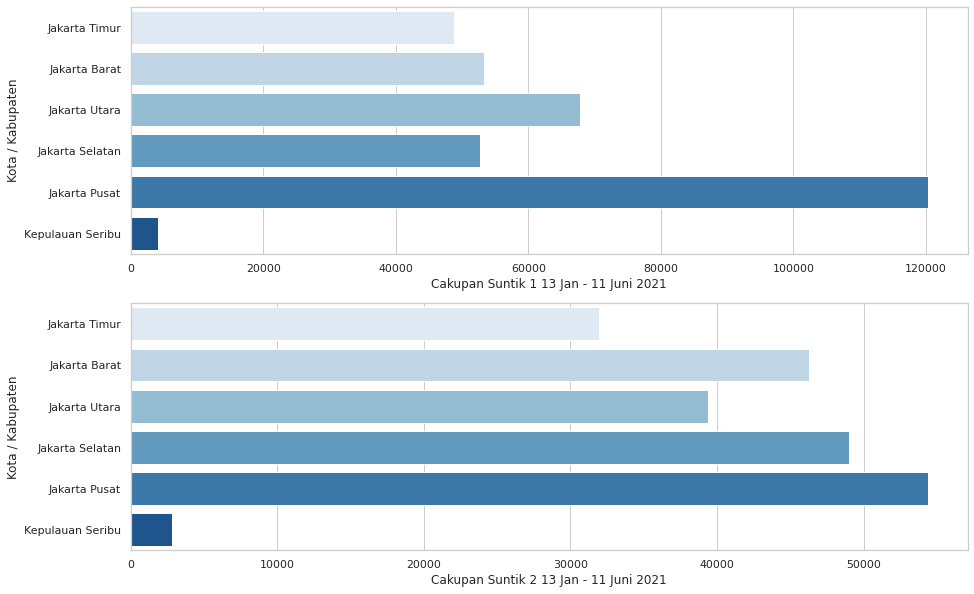

In [ ]:
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(y='Kota / Kabupaten', x='Cakupan Suntik 1 13 Jan - 11 Juni 2021', orient='h', data=data_vaksinasi_wilayah, ci=None, palette='Blues', ax=ax1)
sns.barplot(y='Kota / Kabupaten', x='Cakupan Suntik 2 13 Jan - 11 Juni 2021', data=data_vaksinasi_wilayah, orient='h', ci=None, palette='Blues', ax=ax2)

In [ ]:
df_persentase_vaksinasi_wilayah = data_vaksinasi_wilayah[['Kota / Kabupaten', 'Cakupan Suntik 1 13 Jan - 11 Juni 2021', 'Cakupan Suntik 2 13 Jan - 11 Juni 2021']]
df_persentase_vaksinasi_wilayah.head()

,Kota / Kabupaten,Cakupan Suntik 1 13 Jan - 11 Juni 2021,Cakupan Suntik 2 13 Jan - 11 Juni 2021
0,Jakarta Timur,74966,37590
1,Jakarta Barat,85668,47581
2,Jakarta Barat,42991,23222
3,Jakarta Utara,41494,22305
4,Jakarta Timur,41413,28993


In [ ]:
df_persentase_vaksinasi_wilayah.to_excel('/content/drive/MyDrive/finalProjectCompfest/Vaksinasi Wilayah.xlsx', index=False)

In [52]:
df_persentase_vaksinasi_wilayah = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Vaksinasi Wilayah.xlsx')

In [ ]:
grouped['Persentasi Vaksin 1'] = grouped['Cakupan Suntik 1 13 Jan - 11 Juni 2021'].loc[grouped['']]

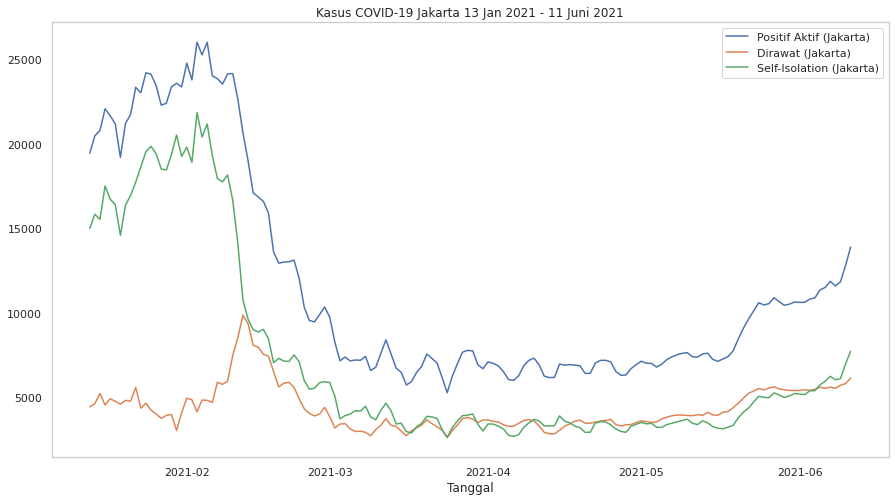

In [ ]:
tanggal = data_combined['Tanggal'].loc[(data_combined['Tanggal'] >= '2021-1-13') & (data_combined['Tanggal'] <= '2021-6-11')]
values = data_combined[['Positif Aktif (Jakarta)', 'Dirawat (Jakarta)', 'Self-Isolation (Jakarta)']].loc[(data_combined['Tanggal'] >= '2021-1-13') & (data_combined['Tanggal'] <= '2021-6-11')]
plt.figure(figsize=(15,8))
plt.title("Kasus COVID-19 Jakarta 13 Jan 2021 - 11 Juni 2021")
plt.xlabel("Tanggal")
plt.plot(tanggal, values)
plt.grid()
plt.legend(values)

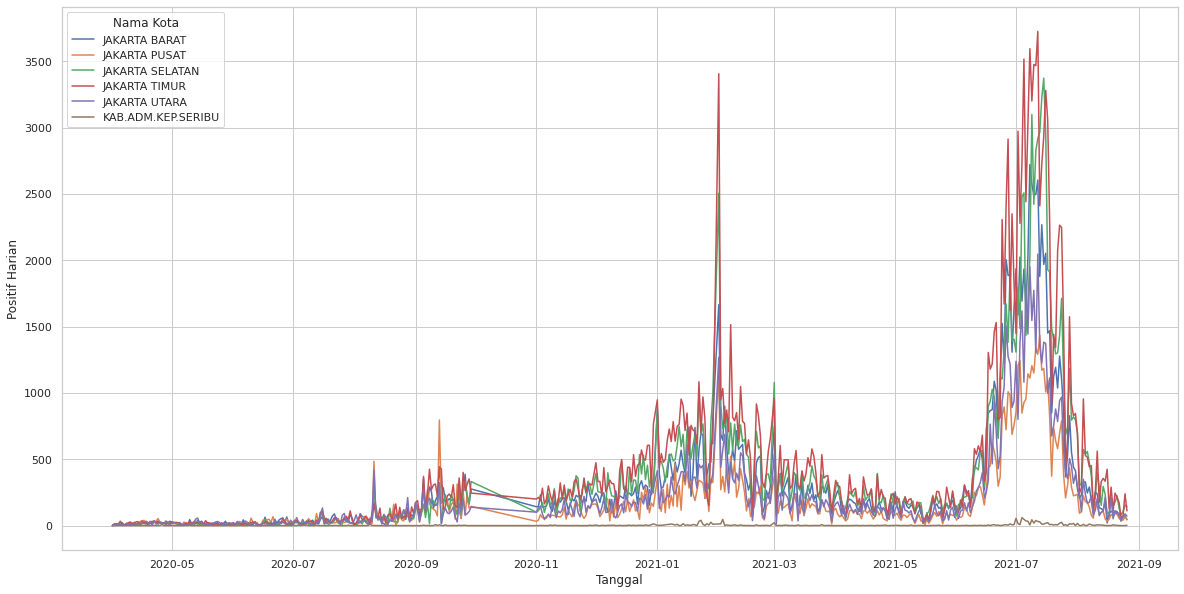

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(y = df['Positif Harian'], x = df['Tanggal'] , hue = df['Nama Kota'], data = df1, ax = ax);

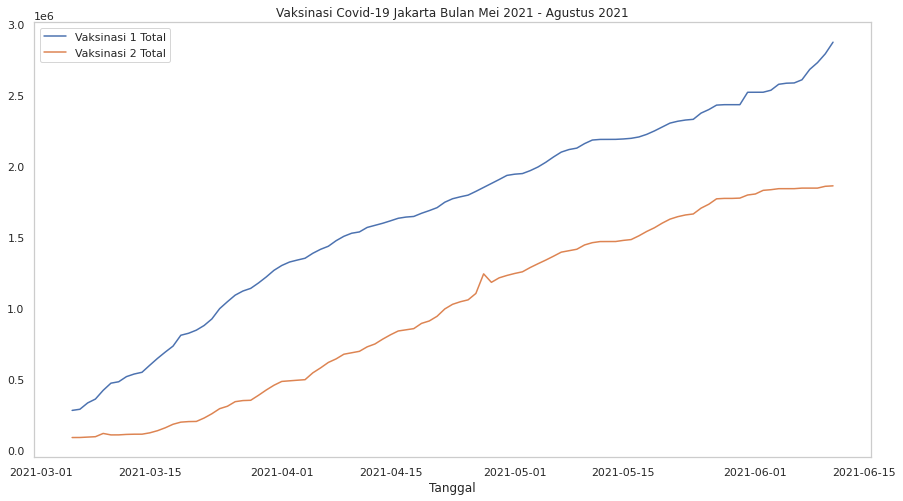

In [ ]:
tanggal = data_combined['Tanggal'].loc[(data_combined['Tanggal'] >= '2021-1-13') & (data_combined['Tanggal'] <= '2021-6-11')]
values = data_combined[['Vaksinasi 1 Total', 'Vaksinasi 2 Total']].loc[(data_combined['Tanggal'] >= '2021-1-13') & (data_combined['Tanggal'] <= '2021-6-11')]
plt.figure(figsize=(15,8))
plt.title("Vaksinasi Covid-19 Jakarta Bulan Mei 2021 - Agustus 2021")
plt.xlabel("Tanggal")
plt.plot(tanggal, values)
plt.grid()
plt.legend(values)

# Laju Pertumbuhan Penduduk

In [ ]:
df_kepadatan_penduduk = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Provinsi_Kabupaten_Kota.xlsx')

In [ ]:
df_kepadatan_penduduk

,Kab/Kota,Jumlah Penduduk 2018,Jumlah Penduduk 2019,Jumlah Penduduk 2020,Laju Pertumbuhan Penduduk per Tahun 2018,Laju Pertumbuhan Penduduk per Tahun 2019,Laju Pertumbuhan Penduduk per Tahun 2020,Persentase Penduduk 2018,Persentase Penduduk 2019,Persentase Penduduk 2020,Kepadatan Penduduk per km2 2018,Kepadatan Penduduk per km2 2019,Kepadatan Penduduk per km2 2020,Rasio Jenis Kelamin Penduduk 2018,Rasio Jenis Kelamin Penduduk 2019,Rasio Jenis Kelamin Penduduk 2020
0,Kep Seribu,24,24,27749,2,2,3,0,0,0,2774,2387,2461,99,100,103
1,Jakarta Selatan,2246,2265,2226812,1,1,1,21,21,21,15900,14675,14664,100,100,102
2,Jakarta Timur,2916,2938,3037139,1,1,1,28,28,29,15508,16080,14390,101,101,101
3,Jakarta Pusat,925,928,1056896,0,0,2,9,9,10,19212,17719,18603,99,99,104
4,Jakarta Barat,2559,2590,2434511,1,2,1,24,25,23,19757,20813,17701,102,102,102
5,Jakarta Utara,1747,1813,1778981,1,1,1,17,17,17,12255,12950,11272,98,98,103
6,DKI Jakarta,10468,10558,10562088,1,1,1,100,100,100,15804,15900,14555,100,100,102


In [ ]:
df_kepadatan_penduduk.describe()

,Jumlah Penduduk 2018,Jumlah Penduduk 2019,Jumlah Penduduk 2020,Laju Pertumbuhan Penduduk per Tahun 2018,Laju Pertumbuhan Penduduk per Tahun 2019,Laju Pertumbuhan Penduduk per Tahun 2020,Persentase Penduduk 2018,Persentase Penduduk 2019,Persentase Penduduk 2020,Kepadatan Penduduk per km2 2018,Kepadatan Penduduk per km2 2019,Kepadatan Penduduk per km2 2020,Rasio Jenis Kelamin Penduduk 2018,Rasio Jenis Kelamin Penduduk 2019,Rasio Jenis Kelamin Penduduk 2020
count,7.000000,7.000000,7.000000e+00,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2983.571429,3016.571429,3.017739e+06,1.00000,1.142857,1.428571,28.428571,28.571429,28.571429,14458.571429,14360.571429,13378.000000,99.857143,100.000000,102.428571
std,3446.529600,3473.527019,3.468976e+06,0.57735,0.690066,0.786796,32.948734,32.928494,32.877840,5730.656735,5826.579067,5380.030173,1.345185,1.290994,0.975900
min,24.000000,24.000000,2.774900e+04,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,2774.000000,2387.000000,2461.000000,98.000000,98.000000,101.000000
25%,1336.000000,1370.500000,1.417938e+06,1.00000,1.000000,1.000000,13.000000,13.000000,13.500000,13881.500000,13812.500000,12831.000000,99.000000,99.500000,102.000000
50%,2246.000000,2265.000000,2.226812e+06,1.00000,1.000000,1.000000,21.000000,21.000000,21.000000,15804.000000,15900.000000,14555.000000,100.000000,100.000000,102.000000
75%,2737.500000,2764.000000,2.735825e+06,1.00000,1.500000,1.500000,26.000000,26.500000,26.000000,17556.000000,16899.500000,16182.500000,100.500000,100.500000,103.000000
max,10468.000000,10558.000000,1.056209e+07,2.00000,2.000000,3.000000,100.000000,100.000000,100.000000,19757.000000,20813.000000,18603.000000,102.000000,102.000000,104.000000


In [ ]:
df_kepadatan_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Kab/Kota                                  7 non-null      object
 1   Jumlah Penduduk 2018                      7 non-null      int64 
 2   Jumlah Penduduk 2019                      7 non-null      int64 
 3   Jumlah Penduduk 2020                      7 non-null      int64 
 4   Laju Pertumbuhan Penduduk per Tahun 2018  7 non-null      int64 
 5   Laju Pertumbuhan Penduduk per Tahun 2019  7 non-null      int64 
 6   Laju Pertumbuhan Penduduk per Tahun 2020  7 non-null      int64 
 7   Persentase Penduduk 2018                  7 non-null      int64 
 8   Persentase Penduduk 2019                  7 non-null      int64 
 9   Persentase Penduduk 2020                  7 non-null      int64 
 10  Kepadatan Penduduk per km2 2018           7 non-null  

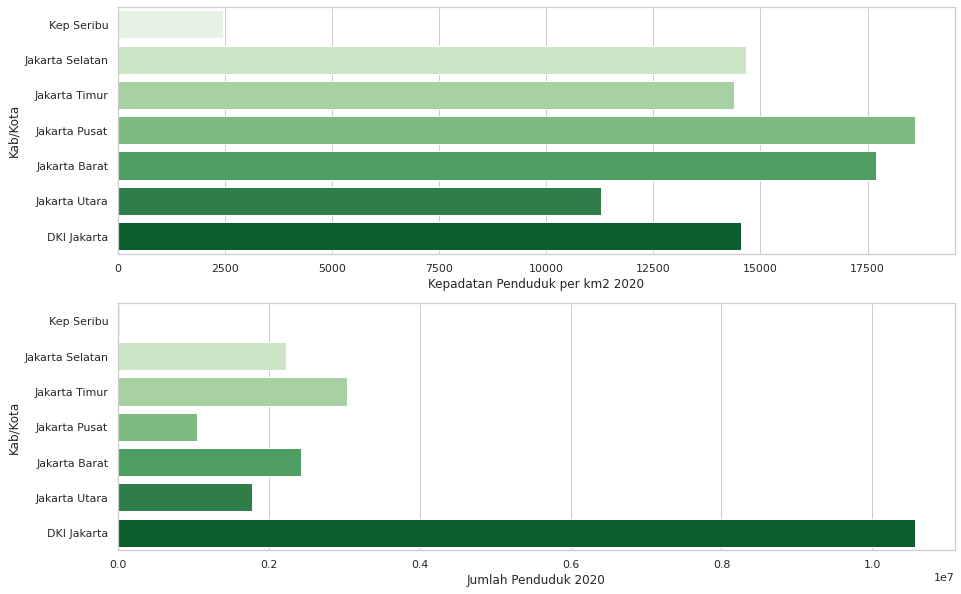

In [ ]:
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(y='Kab/Kota', x='Kepadatan Penduduk per km2 2020', data=df_kepadatan_penduduk , orient='h', ci=None, palette='Greens', ax=ax1)
sns.barplot(y='Kab/Kota', x='Jumlah Penduduk 2020', data=df_kepadatan_penduduk , orient='h', ci=None, palette='Greens', ax=ax2)

# Avarage Congestion

In [ ]:
df_avg_congestion = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Avg congestion Jakarta.xlsx')

In [ ]:
df_avg_congestion.head()

,Tanggal,Average Congestion
0,2021-01-04,20
1,2021-01-05,20
2,2021-01-06,25
3,2021-01-07,29
4,2021-01-08,23


In [ ]:
df_avg_congestion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tanggal             235 non-null    datetime64[ns]
 1   Average Congestion  235 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.8 KB


In [ ]:
df_avg_congestion['Total Avarage Travel Time'] = ((df_avg_congestion['Average Congestion']/100) * 52) + 52

In [ ]:
df_avg_congestion

,Tanggal,Average Congestion,Total Avarage Travel Time
0,2021-01-04,20,62.40
1,2021-01-05,20,62.40
2,2021-01-06,25,65.00
3,2021-01-07,29,67.08
4,2021-01-08,23,63.96
...,...,...,...
230,2021-08-22,8,56.16
231,2021-08-23,19,61.88
232,2021-08-24,21,62.92
233,2021-08-25,22,63.44


In [ ]:
df_avg_congestion.to_excel('/content/drive/MyDrive/finalProjectCompfest/Avg congestion Jakarta.xlsx', index=False)

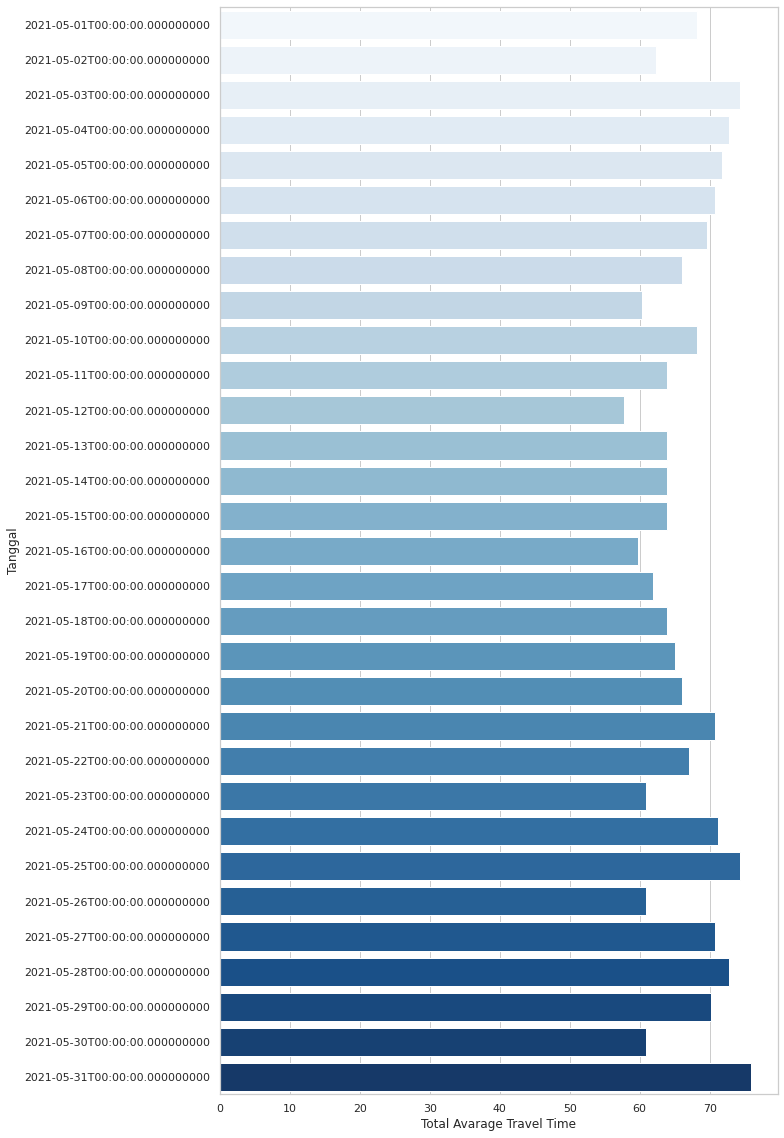

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(y=df_avg_congestion['Tanggal'].loc[(df_avg_congestion['Tanggal'] >= '20210501') & (df_avg_congestion['Tanggal'] <= '20210531')], x='Total Avarage Travel Time', 
            orient='h', data=df_avg_congestion, ci=None, palette='Blues')

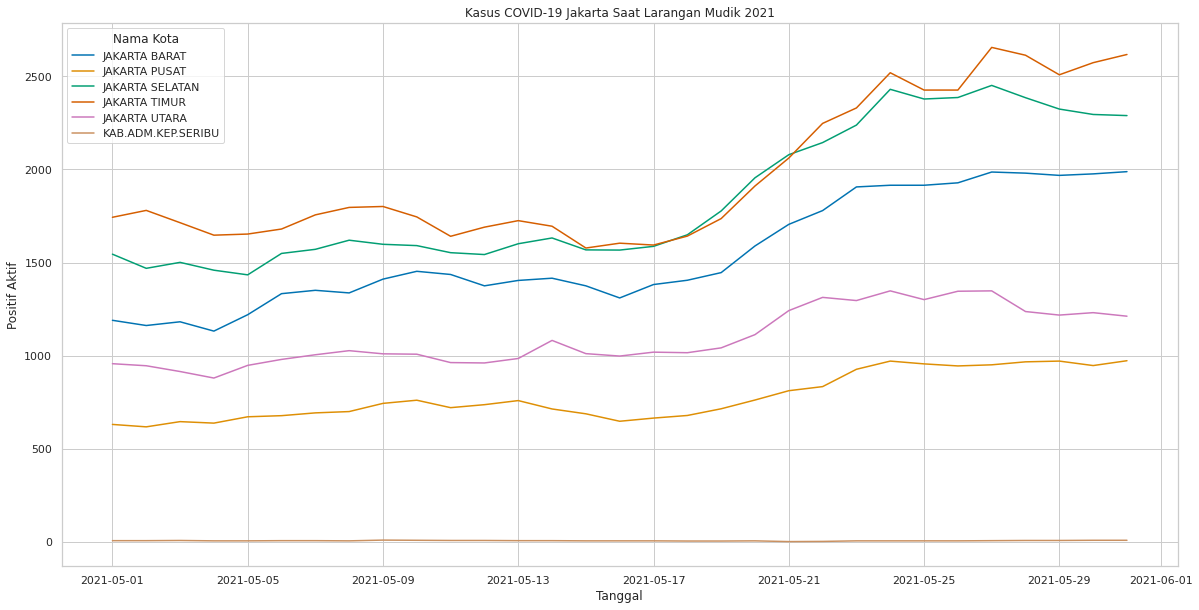

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Kasus COVID-19 Jakarta Saat Larangan Mudik 2021")
sns.lineplot(y = df['Positif Aktif'], 
             x = df['Tanggal'].loc[(df['Tanggal'] >= '20210501') & (df['Tanggal'] <= '20210531')] , 
             hue = df['Nama Kota'], data = df1, ax = ax, palette='colorblind');

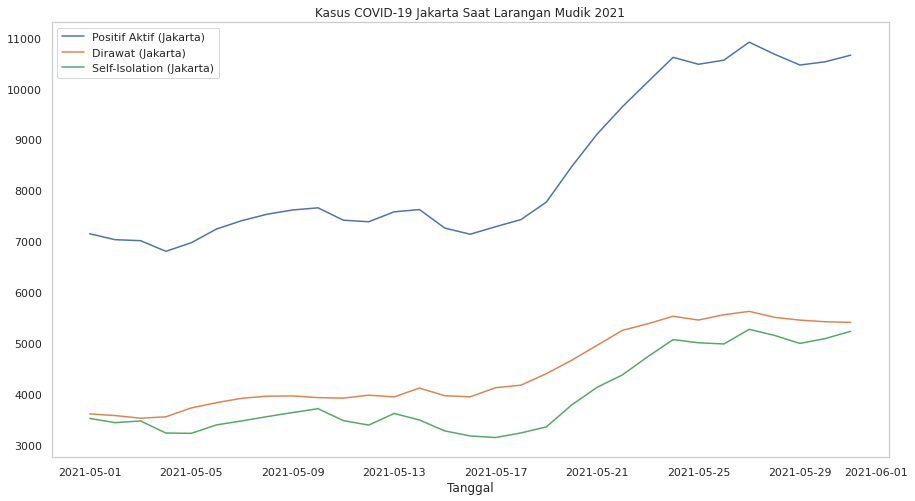

In [ ]:
tanggal = data_combined['Tanggal'].loc[(data_combined['Tanggal'] >= '2021-5-01') & (data_combined['Tanggal'] <= '2021-5-31')]
values = data_combined[['Positif Aktif (Jakarta)', 'Dirawat (Jakarta)', 'Self-Isolation (Jakarta)']].loc[(data_combined['Tanggal'] >= '2021-5-01') & (data_combined['Tanggal'] <= '2021-5-31')]
plt.figure(figsize=(15,8))
plt.title("Kasus COVID-19 Jakarta Saat Larangan Mudik 2021")
plt.xlabel("Tanggal")
plt.plot(tanggal, values)
plt.grid()
plt.legend(values)

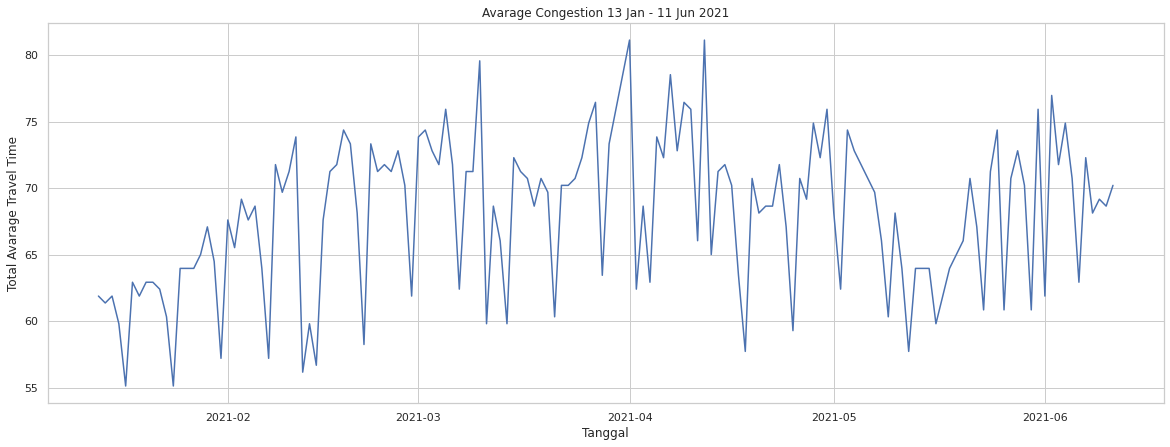

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20,7))
plt.title("Avarage Congestion 13 Jan - 11 Jun 2021")
sns.lineplot(x=df_avg_congestion['Tanggal'].loc[(df_avg_congestion['Tanggal'] >= '20210113') & (df_avg_congestion['Tanggal'] <= '20210611')], 
             y='Total Avarage Travel Time', data=df_avg_congestion, ci=None, palette='Blues')